#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):** Guilherme Goes Zanetti e Luiza Batista Laquini

2. **Matrícula(s):** 2019107824 e 2019107786, respectivamente

3. **E-mail(s) institucional(is):** guilherme.zanetti@edu.ufes.br e luiza.laquini@edu.ufes.br

3. **Curso(s):** Engenharia de Computação (ambos)

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):** https://colab.research.google.com/drive/1gAhGGGmZOlMsPNFY1AocuQVFgNot8wDP?usp=sharing

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

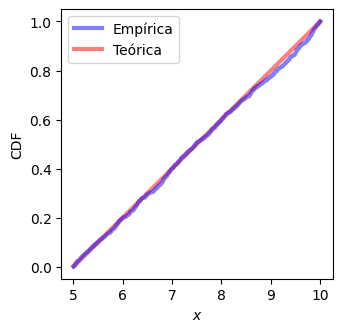

In [ ]:
plot_uniform_cdf(5, 5, 1000)

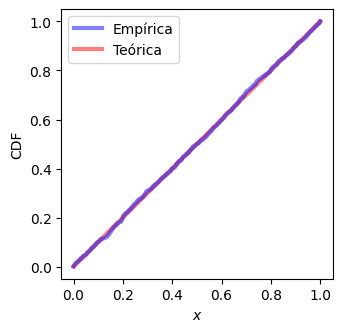

In [ ]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import norm

In [ ]:
def plot_normal_cdf(mu, sigma, n):
  # gera 'n' números de uma distribuição normal
  r = norm.rvs(loc = mu, scale = sigma, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição normal com média mu e desvio padrão sigma
  plt.plot(cdf.x, norm.cdf(cdf.x, loc = mu, scale = sigma),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

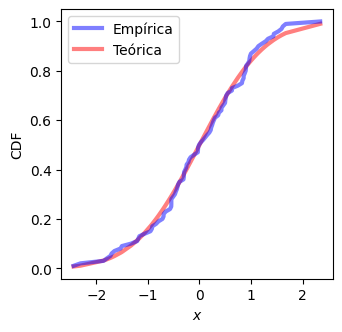

In [ ]:
plot_normal_cdf(0, 1, 100)

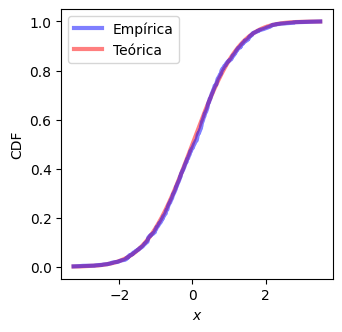

In [ ]:
plot_normal_cdf(0, 1, 1000)

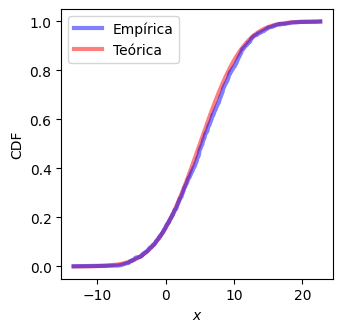

In [ ]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [ ]:
from scipy.stats import expon

In [ ]:
def plot_exponential_cdf(lambda_, n):
  # gera 'n' números de uma distribuição exponencial
  # com formato λe^(−λx), onde λ é o parâmetro lambda_
  r = expon.rvs(scale = 1/lambda_, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição exponencial
  plt.plot(cdf.x, expon.cdf(cdf.x, scale = 1/lambda_),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

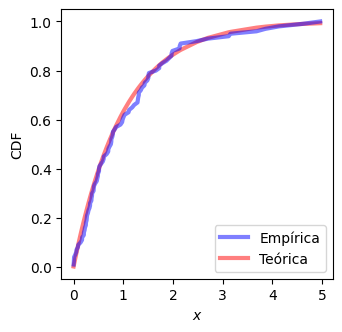

In [ ]:
plot_exponential_cdf(1, 100)

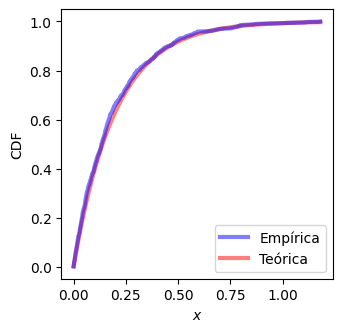

In [ ]:
plot_exponential_cdf(5, 1000)


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import pareto

In [ ]:
def plot_pareto_cdf(b, n):
  # gera 'n' números de uma distribuição de pareto com parâmetro b
  r = pareto.rvs(b = b, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição de pareto com parâmetro b
  plt.plot(cdf.x, pareto.cdf(cdf.x, b = b),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

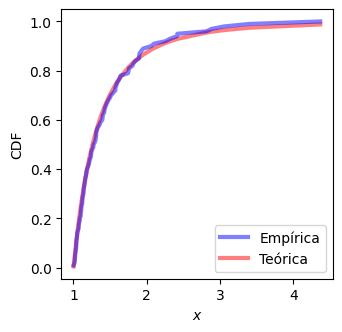

In [ ]:
plot_pareto_cdf(3, 100)

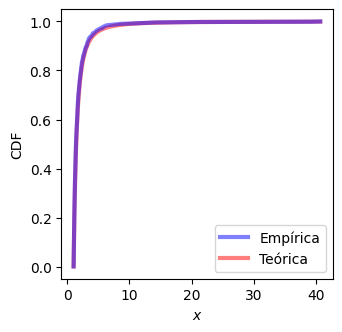

In [ ]:
plot_pareto_cdf(2, 1000)

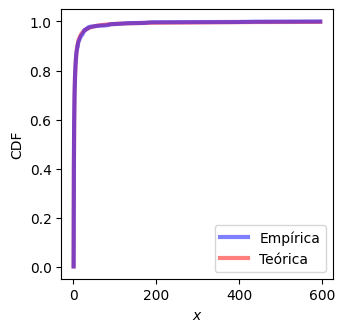

In [ ]:
plot_pareto_cdf(1, 1000)

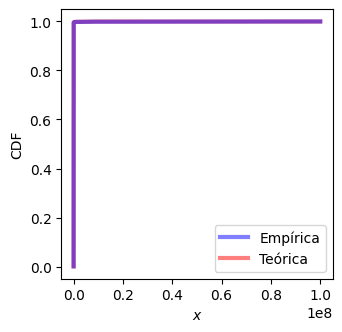

In [ ]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [ ]:
def plot_pareto_ccdf(b, n):
  # gera 'n' números de uma distribuição de pareto com parâmetro b
  r = pareto.rvs(b = b, size = n)

  # plota a CCDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, 1-cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CCDF teórica de uma distribuição de pareto com parâmetro b
  plt.plot(cdf.x, 1-pareto.cdf(cdf.x, b = b),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$')
  plt.ylabel(r'CCDF')
  plt.xscale('log')
  plt.yscale('log')
  plt.gcf().set_size_inches(3.5, 3.5)

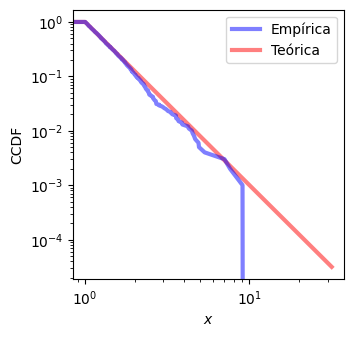

In [ ]:
plot_pareto_ccdf(3, 1000)

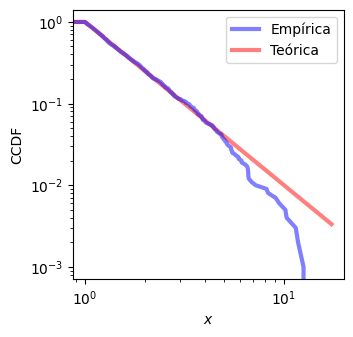

In [ ]:
plot_pareto_ccdf(2, 1000)

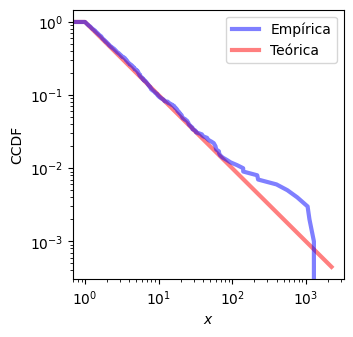

In [ ]:
plot_pareto_ccdf(1, 1000)

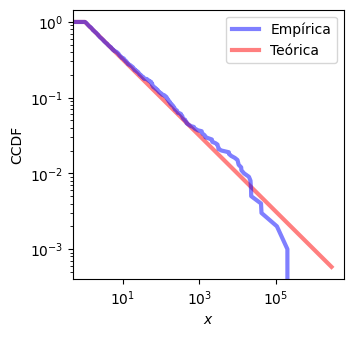

In [ ]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://utw10426.utweb.utexas.edu/quest/Q7/choco.pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?

R. É uma métrica descritiva que mede se - e quanto - existe dependência entre variáveis, ou seja, quanto uma variável interfere na outra. A análise de correlação retornará três casos possíveis:
- Correlação positiva: quando o resultado se aproxima de 1. Nesse caso, se uma variável cresce, a outra tende a crescer proporcionalmente;
- Correlação negativa: quando o resultado se aproxima de -1. Nesse caso, se uma variável cresce, a tende a diminuir proporcionalmente;
- Nenhuma correlação: quando o resultado é proximo de 0. Nesse caso, o comportamento de uma variável é completamente independente do comportamento da outra.

2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?

R. Existem situações em que o coeficiente de correlação pode levar a conclusões incorretas sobre os dados, por exemplo:
- quando existe relação não linear entre as variáveis;
- quando existem outliers;
- quando a amostra de dados é pequena;
- quando existem subgrupos com comportamentos diferentes na mesma base de dados;
- quando a escala dos dados não é linear;
- quando uma variável é composta por outras da mesma base;
- quando existe variância não constante na base de dados (heterocedasticidade).
Portanto, após fazer uma análise inicial da sua base de dados, visualizando a relação entre os dados e garantindo que eles não se encaixam em nenhum dos casos mencionados acima, o coeficiente de correlação pode trazer insights valiosos e ser uma boa ferramenta para entender as relações.

3. Qual a diferença entre causalidade e correlação?

R. Causalidade é o "efeito" de um evento em outro, onde o segundo evento é consequência direta do primeiro. Nesse contexto, se há causalidade entre duas variáveis, a alteração da primeira causa a alteração da segunda. Já a correlação é apenas uma relação entre duas variáveis que não necesssariamente - aliás, muitas vezes - não possuem vínculo de causa e consequência. É por isso que correlações como a do consumo semanal de sorvete e mortes por afogamento podem existir, pois, aparentemente, uma não tem nada a ver com a outra, mas, observando mais a fundo, ambas possuem a mesma causa, que é variação positiva da temperatura do local: quanto mais quente, mais as pessoas entram na piscina e tomam sorvete. Além disso, correlações também podem ser mera coincidência, como no caso de número de filmes do Nicolas Cage versus quantidade de afogamentos.

Em resumo, apenas a correlação não é suficiente para provar uma causalidade.


**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

In [ ]:
import pandas as pd

dfScore = pd.read_csv('dados_questao_4.csv')
display(dfScore)

,score,type
0,0.023120,A
1,0.870633,A
2,-0.051788,A
3,0.490284,A
4,-0.296330,A
...,...,...
14846,0.003600,C
14847,0.000647,C
14848,0.000489,C
14849,0.000835,C


### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

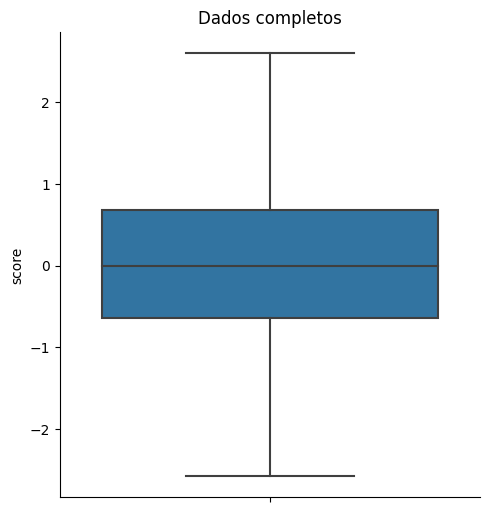

In [ ]:
import seaborn as sns

sns.catplot(y="score", kind="box", data=dfScore).set(title='Dados completos')

Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

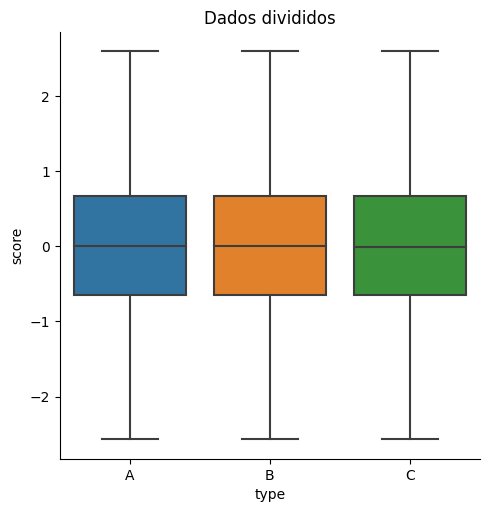

In [ ]:
sns.catplot(x="type", y="score", kind="box", data=dfScore).set(title='Dados divididos')

Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?

Com base apenas nos boxplots, as distribuições dos três tipos parecem ser iguais, com mesma mediana, quartis e mesmos valores máximos e mínimos.


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



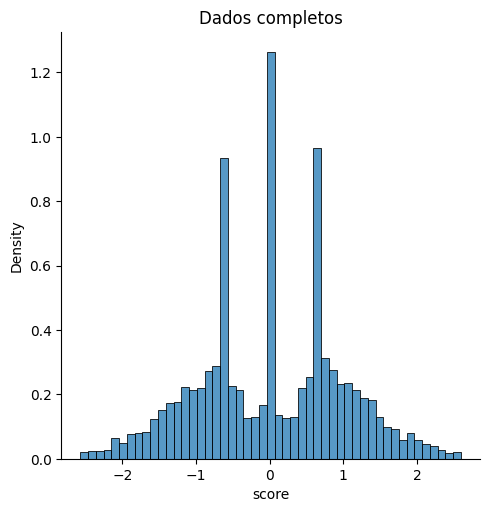

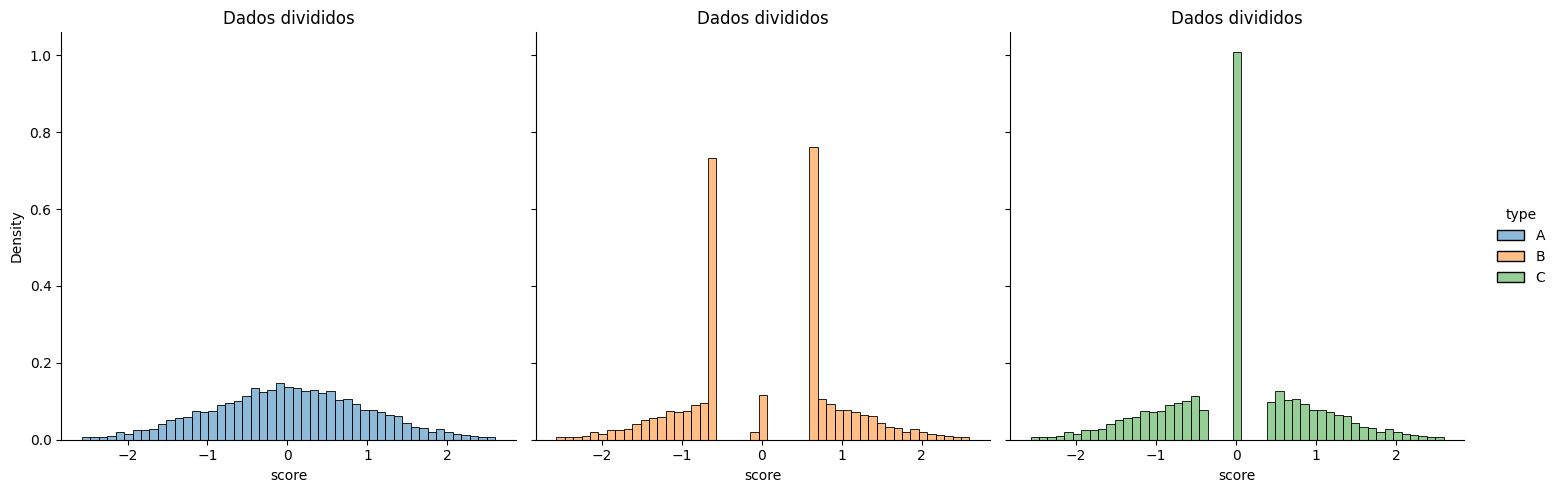

In [ ]:
sns.displot(dfScore, x="score", stat = 'density').set(title='Dados completos')
sns.displot(dfScore, x="score", col = 'type', hue = 'type', stat = 'density').set(title='Dados divididos')

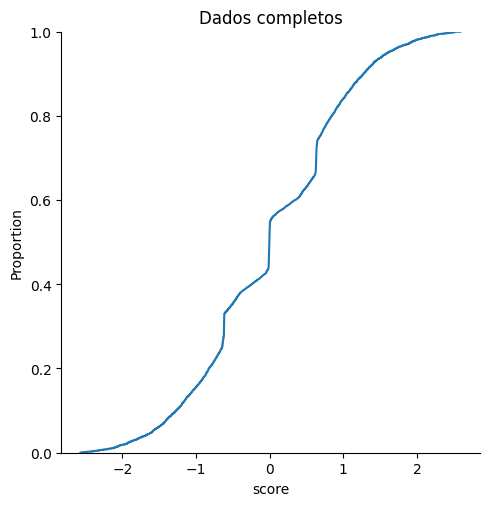

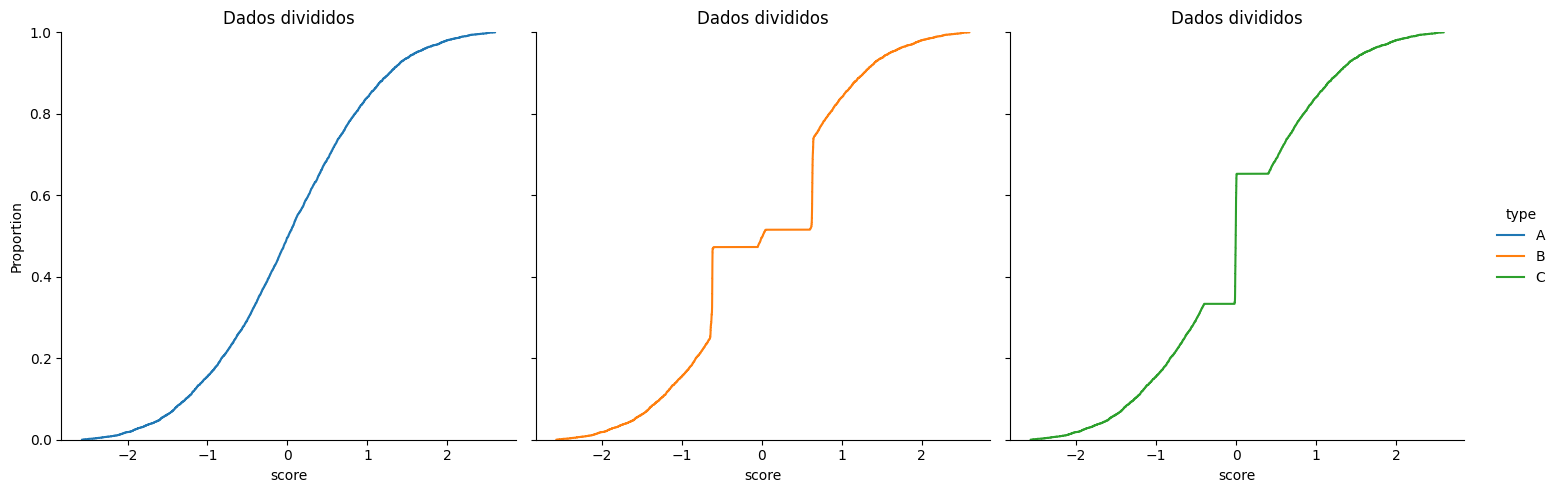

In [ ]:
sns.displot(dfScore, x="score", kind='ecdf').set(title='Dados completos')
sns.displot(dfScore, x="score", col = 'type', hue = 'type', kind='ecdf').set(title='Dados divididos')

[Text(0.5, 1.0, 'Dados divididos')]

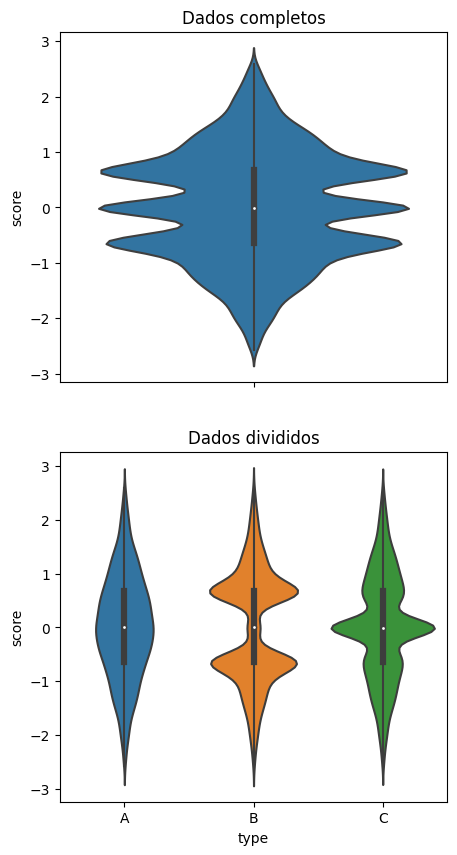

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
sns.violinplot(y="score", kind="violin", data=dfScore, ax=axes[0]).set(title='Dados completos')
sns.violinplot(x="type", y="score", kind="violin", data=dfScore, ax=axes[1]).set(title='Dados divididos')

Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

Analizando os dados com outros tipos de figura, pode-se perceber que a distribuição dos dados são bem diferentes para cada tipo, tendo poucos intervalos pequenos com uma alta concentração de valores no tipo B e C, que não se encontra no tipo A.

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



In [ ]:
dfPontos = pd.read_csv('dados_questao_5.csv')
display(dfPontos)

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

In [ ]:
dfPontos_grouped = dfPontos.groupby('dataset')
for group, group_data in dfPontos_grouped:
  print(group)
  print(f'Média: X = {group_data.x.mean()}, Y = {group_data.y.mean()}')
  print(f'Desvio Padrão: X = {group_data.x.std()}, Y = {group_data.y.std()}')
  print(f'Correlação linear entre X e Y = {group_data.corr(numeric_only = True).y[0]}')
  print('\n=============================')


away
Média: X = 54.266099784204926, Y = 47.83472062488412
Desvio Padrão: X = 16.769824954157365, Y = 26.939743418883353
Correlação linear entre X e Y = -0.06412835215474474

bullseye
Média: X = 54.268730022378875, Y = 47.830823155217814
Desvio Padrão: X = 16.76923949342675, Y = 26.935726689885946
Correlação linear entre X e Y = -0.06858639425794848

circle
Média: X = 54.267319706173936, Y = 47.83771726721831
Desvio Padrão: X = 16.7600126596722, Y = 26.93003608783034
Correlação linear entre X e Y = -0.06834335645012041

dino
Média: X = 54.26327323943662, Y = 47.832252816901416
Desvio Padrão: X = 16.76514203911679, Y = 26.935403486939116
Correlação linear entre X e Y = -0.06447185270095158

dots
Média: X = 54.26030345121761, Y = 47.83982920875564
Desvio Padrão: X = 16.76773548843259, Y = 26.93019151808552
Correlação linear entre X e Y = -0.060341441993538816

h_lines
Média: X = 54.261441783514094, Y = 47.830251913635216
Desvio Padrão: X = 16.765897904068492, Y = 26.93987622003983
Correla

Com base nos valores observados, os dados vindos dos diferentes datasets parecem ser semelhantes, já que todos os valores de média, desvio padrão e correlação entre as variáveis são muito similares para todos os datasets.

### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?

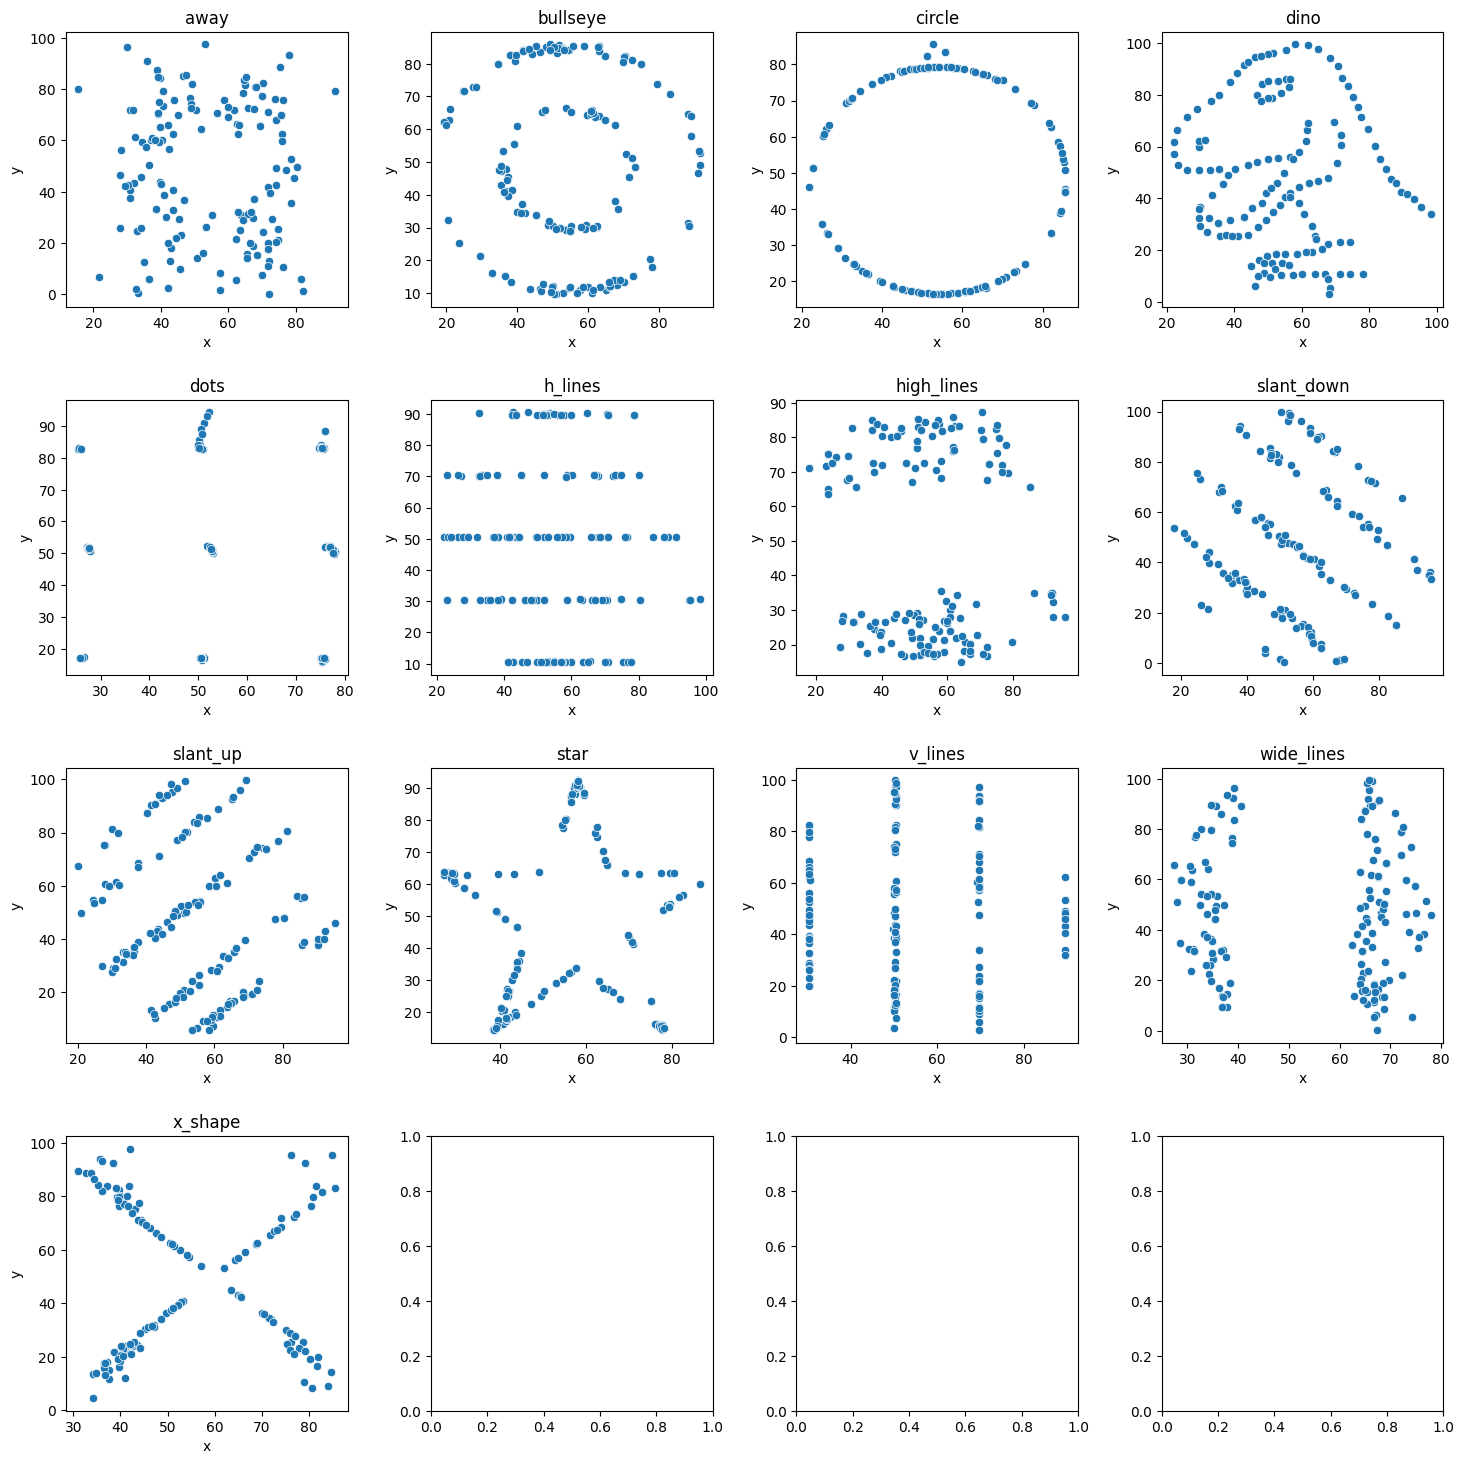

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
i = 0
for group, group_data in dfPontos_grouped:
  sns.scatterplot(x = "x", y = "y", data = group_data, ax=axes[int(i/4)][i%4]).set(title = group)
  i+=1
fig.tight_layout(pad=2.0)

Com base nos gráficos, pode-se facilmente perceber que a distribuição dos dados é bem diferente para cada dataset, apesar deles compartilharem valores de média, desvio padrão e correlação.

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.